In [108]:
import pfb_functions as pfn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import csv

# define case names, the output figure frequency
figure_output_frequency = 1
case_namelist = ['pfclm2_base40']
layer_thicknesslist = [
[2,
1.8232,
0.9116,
0.9116,
0.6837,
0.2279,
0.0182,
0.0137,
0.0137,
0.0137,
0.0137,
0.0137,
0.0114,
0.0091,
0.0046,
0.0023,
]
]

# define dimensions
data_length=336
data_length4storage=data_length+1
ncols=198
nrows=198
nlayers=16
num_case=len(case_namelist)

# computation for subsurface water storage

In [ ]:
# define output file path
sfpath = '/home/chaochen/payette/chaochen/CZO/Chao/Demonstration_example/landlab_Const.Saprolite/postprocessing/1case_checking'
outputfile_soilname_volume = 'pfclm_soil_storage_volume.csv'
outputfile_saproname_volume = 'pfclm_sapro_storage_volume.csv'

outputfile_soilname_depth = 'pfclm_soil_storage_depth.csv'
outputfile_saproname_depth = 'pfclm_sapro_storage_depth.csv'

soilwater_volume_matrix = np.zeros((data_length4storage,num_case),dtype=float)
saprowater_volume_matrix = np.zeros((data_length4storage,num_case),dtype=float)

soilwater_depth_matrix = np.zeros((data_length4storage,num_case),dtype=float)
saprowater_depth_matrix = np.zeros((data_length4storage,num_case),dtype=float)

def thickness_dom (layer_thickness,ncols,nrows,nlayers):
    thick_dom = np.zeros((ncols,nrows,nlayers),dtype=float)
    for i in range(nlayers):
#         thick_dom[:,:,i] = thick_dom[:,:,i] + layer_thickness[i]*5
        thick_dom[:,:,i] = layer_thickness[i]*5
    return thick_dom

def subsurface_storage (case_index,fpath,data_length4storage,num_case,ncols,nrows,case_name,time_step,thick_dom, soilwater_volume_timeseries,saprowater_volume_timeseries,soilwater_depth_timeseries,saprowater_depth_timeseries):

#     print (time_step)
    fname_sat = '%s/%s.out.satur.%05d.pfb' %(fpath,case_name, time_step)
    fname_porosity = '%s/%s.out.porosity.pfb' %(fpath,case_name)
    
    satur = pfn.read(fname_sat)
    porosity = pfn.read(fname_porosity)
    
    depth_imcompressive = satur*porosity*thick_dom  #in unit of meter
    # get all soil layers from domain from soil bottom layer and above
    mask_ws_soil  =  depth_imcompressive[:,:,6:]
    mask_ws_soil_volume  =  mask_ws_soil*30*30
    # print (mask_ws_soil)
    mask_ws_sapro =  depth_imcompressive[:,:,1:6]
    mask_ws_sapro_volume =  mask_ws_sapro*30*30
    # print (mask_ws_sapro)
    # sum soil water storage for all cells
    total_soilwater_volume_map = np.sum(mask_ws_soil_volume, axis=2)
    total_saprowater_volume_map = np.sum(mask_ws_sapro_volume, axis=2)
#     

    
    total_soilwater_depth_map =np.sum(mask_ws_soil, axis=2)
    total_saprowater_depth_map =np.sum(mask_ws_sapro, axis=2)
#     print (total_soilwater_depth_map)
    # compute sum/mean for volume/depth and append the dataframe
    soilwater_volume_timeseries[time_step,case_index] =np.sum(total_soilwater_volume_map)
#     print (time_step,case_index,np.sum(total_soilwater_volume_map),soilwater_volume_timeseries)
    saprowater_volume_timeseries[time_step,case_index]=np.sum(total_saprowater_volume_map)
    
    soilwater_depth_timeseries[time_step,case_index] =total_soilwater_depth_map.mean()
#     print (time_step,case_index,total_soilwater_depth_map.mean(),soilwater_depth_timeseries)
    saprowater_depth_timeseries[time_step,case_index]=total_saprowater_depth_map.mean()
    
    return total_soilwater_volume_map,total_saprowater_volume_map,total_soilwater_depth_map,total_saprowater_depth_map,soilwater_volume_timeseries,saprowater_volume_timeseries,soilwater_depth_timeseries,saprowater_depth_timeseries

##### this following function is conflict with the one of surface water storgae computation
# def plot_ws_2D (time_step,figure_output_frequency,soil_2D_data,sapro_2D_data,sfpath,case_name,variable):
#     if time_step%figure_output_frequency==0:
#         plt.figure(figsize=(10, 7))
#         plt.pcolor(soil_2D_data,cmap='jet')
#         plt.colorbar()
#         plt.savefig('%s/fig/%s_soilwaterstorage_%s_%05d.png'% (sfpath,case_name,variable,time_step))
#         plt.close()     
    
#         plt.figure(figsize=(10, 7))
#         plt.pcolor(sapro_2D_data,cmap='jet')
#         plt.colorbar()
#         plt.savefig('%s/fig/%s_saprowaterstorage_%s_%05d.png'% (sfpath,case_name,variable,time_step))
#         plt.close()

def write_ws_1D (outputfile_soilname,outputfile_saproname, soilwater_data_timeseries,saprowater_data_timeseries):  

    np.savetxt(outputfile_soilname,soilwater_data_timeseries,delimiter=",")
    np.savetxt(outputfile_saproname,saprowater_data_timeseries,delimiter=",")

    
# Main function
def main(soilwater_volume_timeseries,saprowater_volume_timeseries,soilwater_depth_timeseries,saprowater_depth_timeseries):
    for case_index in range (num_case):
        case_name = case_namelist [case_index]
        print (case_name)
        layer_thickness = layer_thicknesslist [case_index]
        fpath = '/home/chaochen/payette/chaochen/CZO/Chao/Demonstration_example/landlab_Const.Saprolite/extended_simulation/outputs_%s_s' % (case_name)
        
        for time_step in range (data_length4storage):
            print (time_step)
            thick_dom=thickness_dom(layer_thickness,ncols,nrows,nlayers)
            (total_soilwater_volume_map,total_saprowater_volume_map,total_soilwater_depth_map,total_saprowater_depth_map, \
             soilwater_volume_timeseries,saprowater_volume_timeseries,soilwater_depth_timeseries,saprowater_depth_timeseries) \
            =subsurface_storage (case_index,fpath,data_length4storage,num_case,ncols,nrows,case_name,time_step,thick_dom,soilwater_volume_timeseries,saprowater_volume_timeseries,soilwater_depth_timeseries,saprowater_depth_timeseries)
            # plot the storage depth, 2D
#             plot_ws_2D (time_step,figure_output_frequency,total_soilwater_depth_map,total_saprowater_depth_map,sfpath,case_name,'storageindepth')
#             plot_ws_2D (time_step,figure_output_frequency,total_soilwater_volume_map,total_saprowater_volume_map,sfpath,case_name,'storageinvolume')

        write_ws_1D (outputfile_soilname_depth,outputfile_saproname_depth,soilwater_depth_timeseries,saprowater_depth_timeseries)
        write_ws_1D (outputfile_soilname_volume,outputfile_saproname_volume,soilwater_volume_timeseries,saprowater_volume_timeseries)

        return soilwater_volume_timeseries,saprowater_volume_timeseries
(soilwater_volume_timeseries,saprowater_volume_timeseries)=main(soilwater_volume_matrix,saprowater_volume_matrix,soilwater_depth_matrix,saprowater_depth_matrix)

pfclm2_base40
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273


# Or, read soil and sparolite water

In [41]:
Datum_SoilS_temp =pd.DataFrame(index=np.arange(0,data_length4storage, 1), columns=case_namelist)
Datum_SaproS_temp =pd.DataFrame(index=np.arange(0,data_length4storage, 1), columns=case_namelist)
#### read pfb file
file_name_index= ('pfclm_soil_storage_volume.csv') 
soilwater_volume_timeseries=pd.read_csv('./%s' %file_name_index, header=None).iloc[:,0]
Datum_SoilS_temp[case_index]=soilwater_volume_timeseries

file_name_index= ('pfclm_sapro_storage_volume.csv') 
saprowater_volume_timeseries=pd.read_csv('./%s' %file_name_index, header=None).iloc[:,0]   
Datum_SaproS_temp[case_index]=saprowater_volume_timeseries

In [26]:
print (soilwater_volume_timeseries)

0      4.630718e+06
1      4.637060e+06
2      4.641703e+06
3      4.644723e+06
4      4.646447e+06
           ...     
331    5.107301e+06
332    5.105250e+06
333    5.103226e+06
334    5.101224e+06
335    5.099243e+06
Name: 0, Length: 336, dtype: float64


# read, not computate, for surface water storage

In [ ]:
# run the water balnce tcl to compute the surface water storage
# import tkinter
# tcl = tkinter.Tcl()
# # result = tcl.eval (filename runname stoptime TimingInfo_DumpInterval)
# result = tcl.eval('source WaterBalance_cal_1case.tcl pfclm2_base40 100 1')


In [110]:
# total_SS_storage_matrix =np.zeros((data_length4storage,num_case),dtype=float)
Datum_SS_temp =pd.DataFrame(index=np.arange(0,data_length+1, 1), columns=case_namelist)


In [112]:
#### read pfb file
for case_index in case_namelist:
    file_name_index= ('total_surface_storage_%s.csv' %(case_index))
    
    data=pd.read_csv('./csv/%s' %file_name_index , header=None).iloc[:,1]

    Datum_SS_temp[case_index]=data
    
### the values are computed at the end of each time step, when read 1-5, it put 0-4, so 1 shift is needed
#     Datum_SS=Datum_SS_temp.shift(1, axis = 0) 
print (Datum_SS_temp)

     pfclm2_base40
0         0.000000
1        58.080303
2      1147.945662
3      3350.242841
4      6752.892546
..             ...
332   18517.084005
333   18510.552630
334   18505.585935
335   18501.995365
336   18498.546854

[337 rows x 1 columns]


# read ET,with variable evaptrans

In [113]:
Datum_ET_temp =pd.DataFrame(index=np.arange(0,data_length+1, 1), columns=case_namelist)


In [114]:
#### read pfb file
for case_index in case_namelist:
    file_name_index= ('ET_%s.csv' %(case_index))
    
    data=pd.read_csv('./csv/%s' %file_name_index , header=None).iloc[:,1]

    Datum_ET_temp[case_index]=data
    
### the values are computed at the end of each time step, when read 1-5, it put 0-4, so 1 shift is needed
    Datum_ET=Datum_ET_temp.shift(1, axis = 0) 
print (Datum_ET)

     pfclm2_base40
0              NaN
1        -4.241591
2       -27.308579
3       -19.398690
4       -23.273626
..             ...
332      -0.771832
333      -2.992570
334      -2.667811
335      -2.271950
336      -2.404419

[337 rows x 1 columns]


# computation for ET

In [ ]:
ET_storage_timeseries =np.zeros((data_length+1,num_case),dtype=float)
ET_depth_timeseries =np.zeros((data_length+1,num_case),dtype=float)

#### read pfb file
def ET_compute (sfpath,file_path,case_index,time_step,figure_output_frequency):

    if time_step >0:

        fnameevap = ('%s/%s.out.qflx_evap_tot.%05d.pfb' %(file_path,case_index,time_step))
        fnametran = ('%s/%s.out.qflx_tran_veg.%05d.pfb' %(file_path,case_index,time_step))

        evap_mms = pfn.read(fnameevap)
        #print (evap_mms)
        tran_mms = pfn.read(fnametran)
        #print (tran_mms)


        tran_mh =tran_mms *3600 /1000
        evap_mh =evap_mms *3600 /1000

        surface_tran_volume =tran_mh *30 *30
        surface_evap_volume =evap_mh *30 *30

        ET_volume_map=surface_tran_volume+surface_evap_volume

        surface_tran_depth =tran_mh
        surface_evap_depth =evap_mh

        ET_depth_map=surface_tran_depth+surface_evap_depth
        total_ET_storage = ET_volume_map.sum()      
        surface_ET_depth = ET_depth_map.mean()

#         global total_ET_storage_timeseries
        ET_storage_timeseries[time_step,case_namelist.index(case_index)]= total_ET_storage 
#         print (time_step, case_index, total_ET_storage, ET_storage_timeseries)
        ET_depth_timeseries[time_step,case_namelist.index(case_index)]= surface_ET_depth
        
        plot_ws_2D_ET (time_step,figure_output_frequency,ET_depth_map[:,:,0],ET_volume_map[:,:,0],sfpath,case_index)

#     return surface_ET_volume_map[:,:,0], surface_ET_depth_map[:,:,0], ET_storage_timeseries, ET_depth_timeseries          
    return ET_storage_timeseries, ET_depth_timeseries   

def write_1D (outputfile_depth_name,outputfile_volume_name, ET_storage_timeseries, ET_depth_timeseries):
    np.savetxt(outputfile_volume_name,ET_storage_timeseries ,delimiter=",")
    np.savetxt(outputfile_depth_name,ET_depth_timeseries,delimiter=",")
    
def plot_ws_2D_ET (time_step,figure_output_frequency,total_ET_depth,total_ET_volume,sfpath,case_name):
    if time_step%figure_output_frequency==0:
        plt.figure(figsize=(10, 7))
        plt.pcolor(total_ET_depth,cmap='jet')
        plt.colorbar()
        plt.savefig('%s/fig/%s_ET_depth_%05d.png'% (sfpath,case_name,time_step))
        plt.close()     
    
        plt.figure(figsize=(10, 7))
        plt.pcolor(total_ET_volume,cmap='jet')
        plt.colorbar()
#         plt.plot
        plt.savefig('%s/fig/%s_ET_volume_%05d.png'% (sfpath,case_name,time_step))
        plt.close()
        
# undistribut the ET and related clm output file, if needed
# edit the code in the undist. tcl, when needed!!! expecially the output file location as defined in the tcl script

# import tkinter
# tcl = tkinter.Tcl()
# result = tcl.eval('source undist.tcl pfclm2_base40 1 6')


# Main function
def main(ET_storage_timeseries,ET_depth_timeseries,sfpath):

    for case_index in case_namelist:
        file_path=('/home/chaochen/payette/chaochen/CZO/Chao/Demonstration_example/landlab_Const.Saprolite/extended_simulation/outputs_%s_s' %(case_index))
        print (case_index)
        
        for time_step in range(data_length+1):
#             print (time_step)
            
            (ET_storage_timeseries, ET_depth_timeseries) \
            = ET_compute(sfpath,file_path,case_index,time_step,figure_output_frequency)
            
            
    return ET_storage_timeseries,ET_depth_timeseries
(ET_storage_timeseries,ET_depth_timeseries)=main(ET_storage_timeseries,ET_depth_timeseries,sfpath)

In [ ]:
# ET_storage_timeseries

In [15]:
Datum_ET_temp= pd.DataFrame(index=np.arange(0,data_length+1, 1), columns=case_namelist)
print (Datum_ET_temp)
print (ET_storage_timeseries)
Datum_ET_temp[case_index]=ET_storage_timeseries

# print (Datum_ET_temp)
    
# Datum_ET=Datum_ET_temp.shift(1, axis = 0) 
# the dataset seems a zero in the 0 timestep,
Datum_ET=Datum_ET_temp
print (Datum_ET)

    pfclm2_base40
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
..            ...
332           NaN
333           NaN
334           NaN
335           NaN
336           NaN

[337 rows x 1 columns]


NameError: name 'ET_storage_timeseries' is not defined

# read for surface runoff

In [115]:
### since the surface runoff is computed from tcl script, setups are required in tcl script
Datum_SR_temp= pd.DataFrame(index=np.arange(0,data_length+1, 1), columns=case_namelist)
#### read surface runoff (SR)
for case_index in case_namelist:
    file_name_index= ('total_surface_runoff_%s.csv' %(case_index))
    
    data=pd.read_csv('./csv/%s' %file_name_index , header=None).iloc[:,1]

    Datum_SR_temp[case_index]=data
    
### the values are computed at the end of each time step, when read 1-5, it put 0-4, so 1 shift is needed
    Datum_SR=Datum_SR_temp.shift(1, axis = 0) 

# read precipitation

In [116]:
Datum_P_temp= pd.DataFrame(index=np.arange(0,data_length, 1), columns=case_namelist)
### load precipitation, in unit of mm/s
clm_input_path= '/home/chaochen/payette/chaochen/CZO/Chao/Demonstration_example/landlab_Const.Saprolite/clm_input'
clm_input='narr_1hr_new_extended.txt'
file = np.loadtxt('%s/%s' %(clm_input_path,clm_input)) 

precip_mms=file[0:data_length,2] 
precip_mh=precip_mms*3600/1000


Datum_P_temp[case_index]=precip_mh*30*30*198*198
Datum_P=Datum_P_temp.shift(1, axis = 0) 
print (Datum_P)

     pfclm2_base40
0              NaN
1              0.0
2              0.0
3              0.0
4              0.0
..             ...
331            0.0
332            0.0
333            0.0
334            0.0
335            0.0

[336 rows x 1 columns]


# plotting

In [117]:
# data formating
# computation delta storage, for SS
Delta_SS=pd.DataFrame(index=np.arange(0,data_length4storage, 1), columns=case_namelist)
Delta_SS_b4shft=np.diff(Datum_SS_temp,axis=0)
Delta_SS_aftshft=np.insert(Delta_SS_b4shft, 0, [0], axis=0)
Delta_SS[case_index]=Delta_SS_aftshft
# print (Delta_SS)

# data formating
# computation delta storage, for soil storage
Delta_SoilS=pd.DataFrame(index=np.arange(0,data_length4storage, 1), columns=case_namelist)
Delta_SoilS_b4shft=np.diff(Datum_SoilS_temp,axis=0)
Delta_SoilS_aftshft=np.insert(Delta_SoilS_b4shft, 0, [0], axis=0)
Delta_SoilS[case_index]=Delta_SoilS_aftshft
print (Delta_SoilS)

# data formating
# computation delta storage, for saprolite water storage
Delta_SaproS=pd.DataFrame(index=np.arange(0,data_length4storage, 1), columns=case_namelist)
Delta_SaproS_b4shft=np.diff(Datum_SaproS_temp,axis=0)
Delta_SaproS_aftshft=np.insert(Delta_SaproS_b4shft, 0, [0], axis=0)
Delta_SaproS[case_index]=Delta_SaproS_aftshft
print (Delta_SaproS)



     pfclm2_base40
0         0.000000
1      6341.392788
2      4643.499043
3      3019.827438
4      1724.366881
..             ...
332   -2050.808157
333   -2024.476647
334   -2001.621010
335   -1981.380218
336            NaN

[337 rows x 1 columns]
     pfclm2_base40
0         0.000000
1     -6643.284359
2     -6581.637204
3     -6505.551694
4     -6442.227585
..             ...
332   -4760.668056
333   -4786.769491
334   -4815.381887
335   -4841.523582
336            NaN

[337 rows x 1 columns]


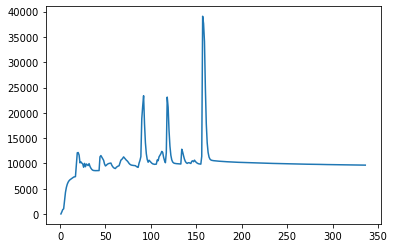

In [129]:
#plt.plot (Datum_ET[80:100])
#plt.plot(Delta_SaproS[80:100])
#plt.plot(Delta_SoilS[80:100])
#plt.plot(Delta_SS[80:100])
plt.plot(Datum_SR)

#plt.plot(Datum_P[80:100])
# print (Datum_P)
#plt.plot(Delta_SS[80:100]+Delta_SoilS[80:100]+Delta_SaproS[80:100]+Datum_SR[80:100])


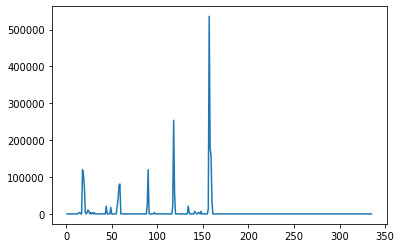

In [130]:
plt.plot(Datum_P)

     pfclm2_base40
0              NaN
1              0.0
2              0.0
3              0.0
4              0.0
..             ...
331            0.0
332            0.0
333            0.0
334            0.0
335            0.0

[336 rows x 1 columns]      pfclm2_base40
0              NaN
1        32.113637
2       429.191868
3       891.001566
4      1033.849732
..             ...
332   10150.437261
333   10147.244640
334   10143.818176
335   10140.373228
336   10137.034161

[337 rows x 1 columns]      pfclm2_base40
0              NaN
1              inf
2              inf
3              inf
4              inf
..             ...
332            inf
333            inf
334            inf
335            inf
336            NaN

[337 rows x 1 columns]


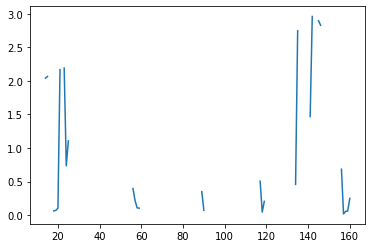

In [105]:
# runoff ratio: surface runoff/precipitation
runoff_ratio=Datum_SR/Datum_P
print(Datum_P,Datum_SR,runoff_ratio)
plt.plot(runoff_ratio)

In [ ]:
plt.plot(np.diff(soilwater_volume_timeseries+saprowater_volume_timeseries+Datum_SS_temp,axis=0)+Datum_SR)